In [8]:
from model.RegionsPlotter import plot_regions_deliverable_e17
from model.MatFileStorageParser import FileModel
from model.RegionsCalcs import create_regions
import numpy as np

In [9]:
file = "use_case_2_4_pools_links.mat"

bs, nf, nm, links = FileModel.load_file_extended(file)

BaseStations = bs
NMacroCells = nm
NFemtoCells = nf
Links = links

In [10]:
BaseStations[:,0] = BaseStations[:,0]
BaseStations[:,1] = BaseStations[:,1]


# Correct the gaps between celds and border
min_x, min_y = np.min(BaseStations[:,0]), np.min(BaseStations[:,1])
margin = 2

# Transform the BaseStations positions
BaseStations[:,0] = BaseStations[:,0] - min_x + margin
BaseStations[:,1] = BaseStations[:,1] - min_y + margin

# Calculate the Maplimit
max_x, max_y = np.max(BaseStations[:,0]), np.max(BaseStations[:,1])
Maplimit = max(max_x, max_y) + margin


# Store the map limit values for further uses
min_x_map, min_y_map, max_x_map, max_y_map = 0, 0, Maplimit, Maplimit

In [11]:
macro_bs, femto_bs = BaseStations[:NMacroCells], BaseStations[NMacroCells:]
max_radius_km_list = [1] * len(femto_bs)
polygon_bounds = [(0, 0), (Maplimit, 0), (Maplimit, Maplimit), (0, Maplimit), (0, 0)]
# Femtocells
Regions_fem, _ = create_regions(
    np.array(femto_bs),
    4.0,
    max_radius_km_list=max_radius_km_list,
    polygon_bounds=polygon_bounds,
)

In [12]:
nodes_with_femtocells = np.zeros(len(BaseStations))
nodes_with_femtocells[NMacroCells:] = 1

nodes_with_hpld = np.zeros(len(BaseStations))
nodes_with_hpld[:4] = 1

base_associations = np.zeros(len(BaseStations))


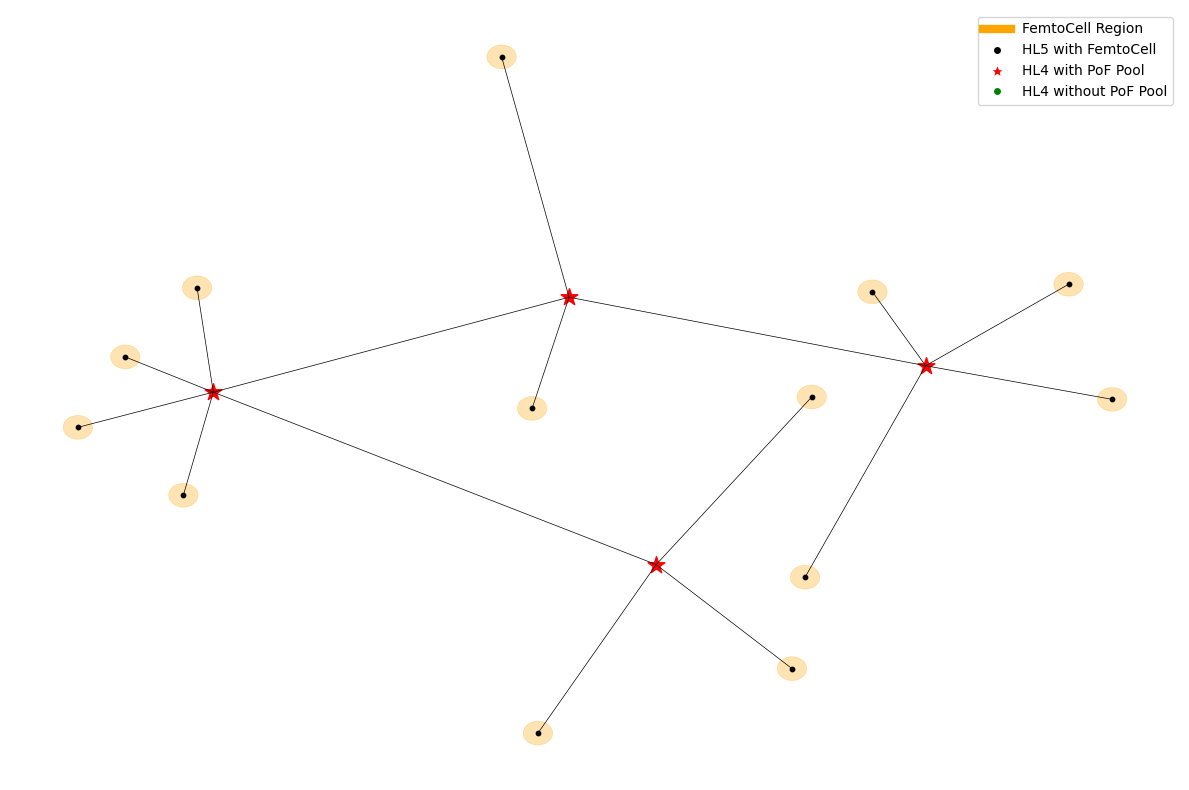

In [13]:
fig, ax = plot_regions_deliverable_e17(
    BaseStations,
    nodes_with_femtocells,
    nodes_with_hpld,
    Links,
    Regions_fem,
    title="UC1 - PoF Pools on HL4",
)

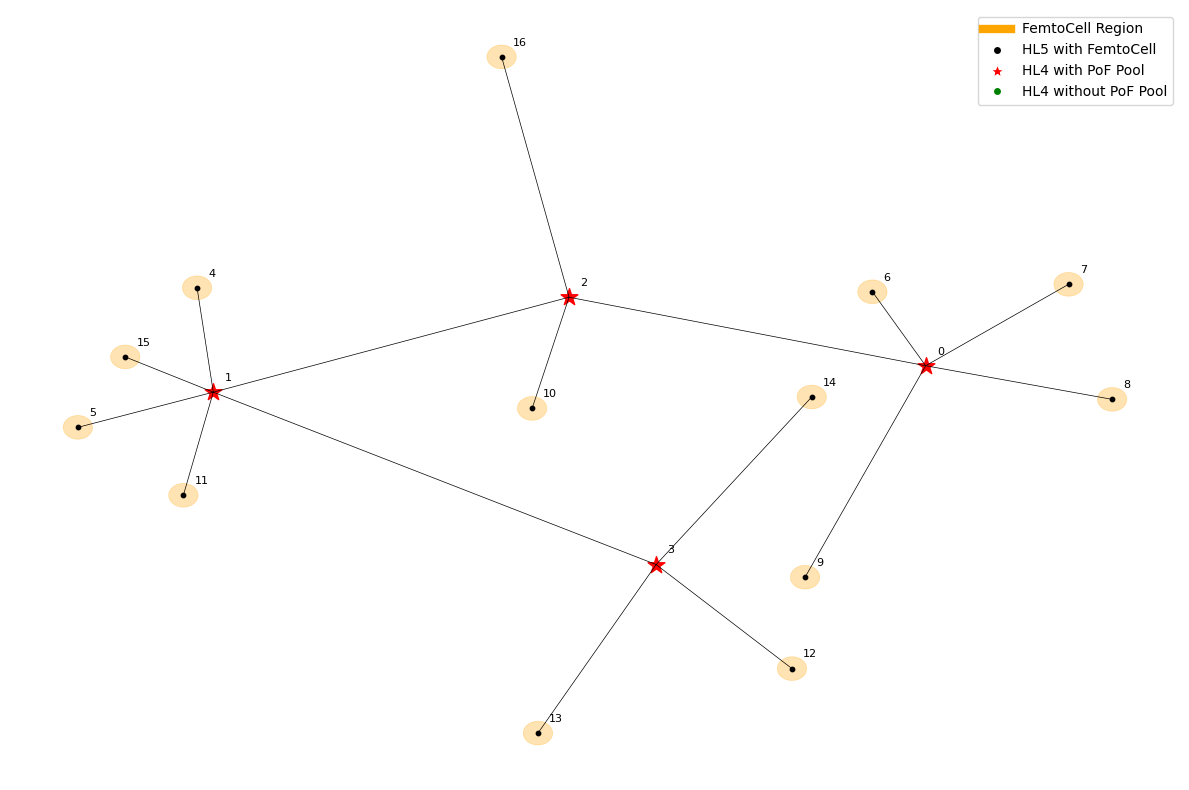

In [14]:
fig, ax = plot_regions_deliverable_e17(
    BaseStations,
    nodes_with_femtocells,
    nodes_with_hpld,
    Links,
    Regions_fem,
    title="UC1 - PoF Pools on HL4",
    draw_node_names=True,
)